## Data Wrangling, Exploratory Data Analysis, and Data Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### Data Cleaning

In [9]:
# orders
missing_value_orders = orders.isnull().sum()
percentage_missing_orders = missing_value_orders / len(orders)
percentage_missing_orders = pd.DataFrame({'Total' : missing_value_orders, 'Percentage' :percentage_missing_orders})
percentage_missing_orders

,Total,Percentage
order_id,0,0.000000
user_id,0,0.000000
eval_set,0,0.000000
order_number,0,0.000000
order_dow,0,0.000000
order_hour_of_day,0,0.000000
days_since_prior_order,206209,0.060276


In [10]:
new_orders = orders[orders['days_since_prior_order'].notnull()]
new_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [11]:
# orders
missing_value_products = products.isnull().sum()
percentage_missing_products = missing_value_products / len(products)
percentage_missing_products = pd.DataFrame({'Total' : missing_value_products, 'Percentage' :percentage_missing_products})
percentage_missing_products

,Total,Percentage
product_id,0,0.0
product_name,0,0.0
aisle_id,0,0.0
department_id,0,0.0


In [12]:
# aisles
missing_value_aisles = aisles.isnull().sum()
percentage_missing_aisles = missing_value_aisles / len(aisles)
percentage_missing_aisles = pd.DataFrame({'Total' : missing_value_aisles, 'Percentage' :percentage_missing_aisles})
percentage_missing_aisles

,Total,Percentage
aisle_id,0,0.0
aisle,0,0.0


In [13]:
# departments
missing_value_departments = departments.isnull().sum()
percentage_missing_departments = missing_value_departments / len(departments)
percentage_missing_departments = pd.DataFrame({'Total' : missing_value_departments, 'Percentage' :percentage_missing_departments})
percentage_missing_departments

,Total,Percentage
department_id,0,0.0
department,0,0.0


In [14]:
# order_products_prior
missing_value_order_products_prior = order_products_prior.isnull().sum()
percentage_missing_order_products_prior = missing_value_order_products_prior / len(order_products_prior)
percentage_missing_order_products_prior = pd.DataFrame({'Total' : missing_value_order_products_prior, 'Percentage' :percentage_missing_order_products_prior})
percentage_missing_order_products_prior

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


In [15]:
# order_train
missing_value_order_products_train = order_products_train.isnull().sum()
percentage_missing_order_products_train = missing_value_order_products_prior / len(order_products_train)
percentage_missing_order_products_train = pd.DataFrame({'Total' : missing_value_order_products_train, 'Percentage' :percentage_missing_order_products_train})
percentage_missing_order_products_train

,Total,Percentage
order_id,0,0.0
product_id,0,0.0
add_to_cart_order,0,0.0
reordered,0,0.0


### EDA

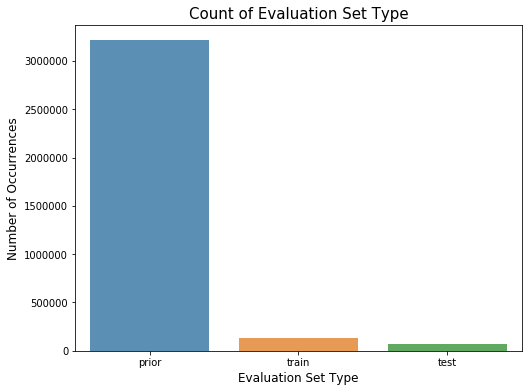

In [16]:
count = orders['eval_set'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Evaluation Set Type', fontsize=12)
plt.title('Count of Evaluation Set Type', fontsize=15)
plt.show()

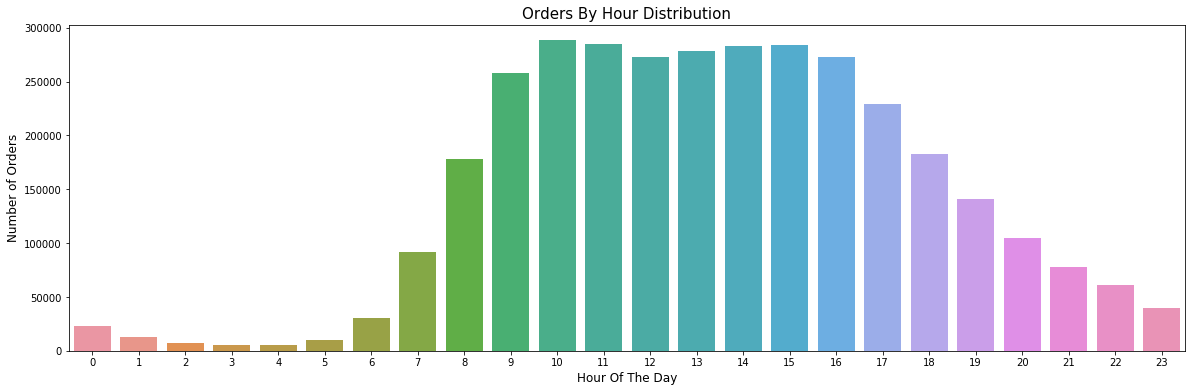

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data=orders, x="order_hour_of_day")
plt.xlabel('Hour Of The Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Orders By Hour Distribution', fontsize=15)
plt.show()

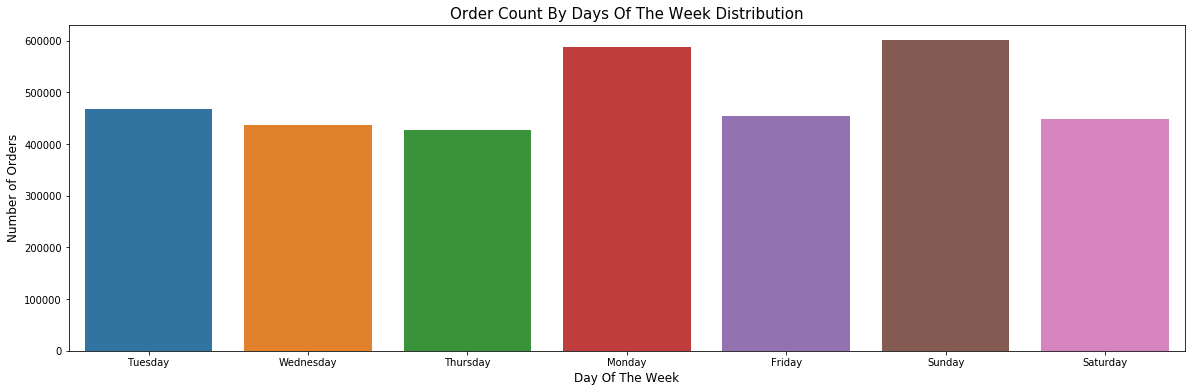

In [18]:
plt.figure(figsize=(20,6))
dayMap = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
orders_Day = orders[['order_dow']].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
sns.countplot(data=orders_Day, x='order_dow')
plt.xlabel('Day Of The Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Order Count By Days Of The Week Distribution', fontsize=15)
plt.show()

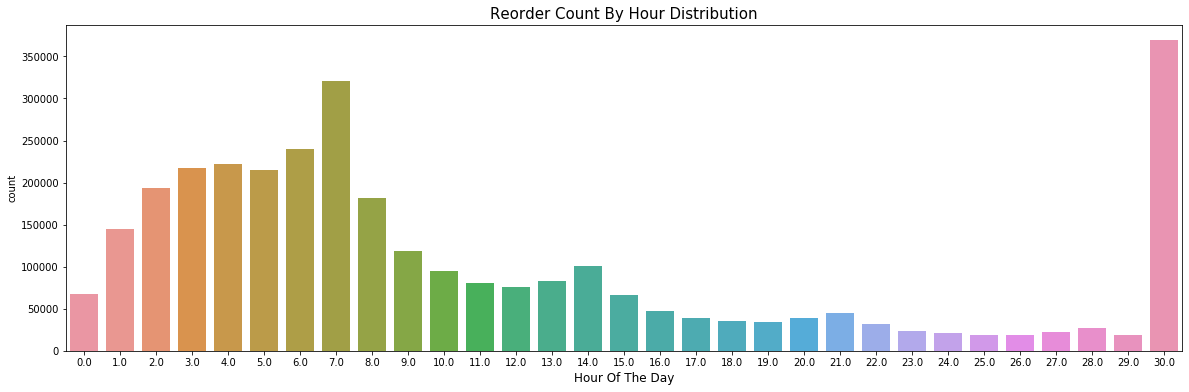

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(data=orders,x="days_since_prior_order")
plt.xlabel('Hour Of The Day', fontsize=12)
plt.title('Reorder Count By Hour Distribution', fontsize=15)
plt.show()

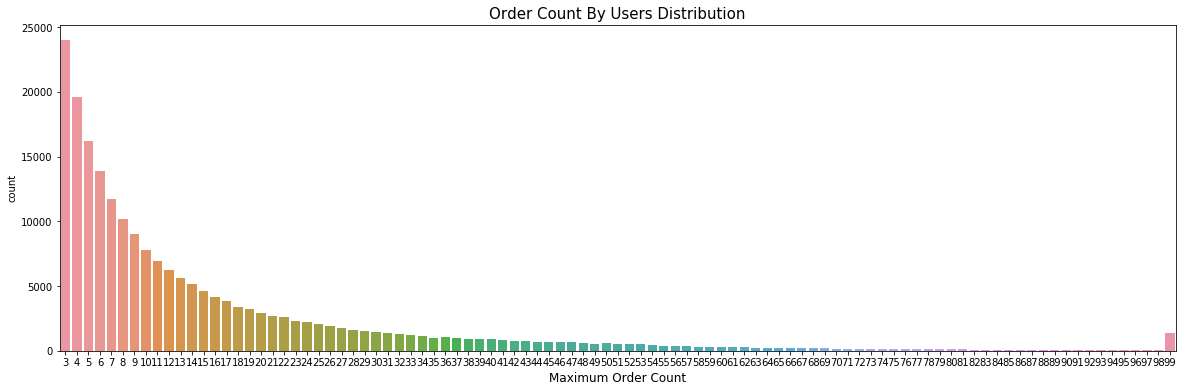

In [20]:
orderCount = orders[orders["eval_set"]=="prior"].groupby(["user_id"])["order_id"].count().to_frame()
plt.figure(figsize=(20,6))
sns.countplot(data=orderCount,x="order_id")
plt.xlabel('Maximum Order Count', fontsize=12)
plt.title('Order Count By Users Distribution', fontsize=15)
plt.show()

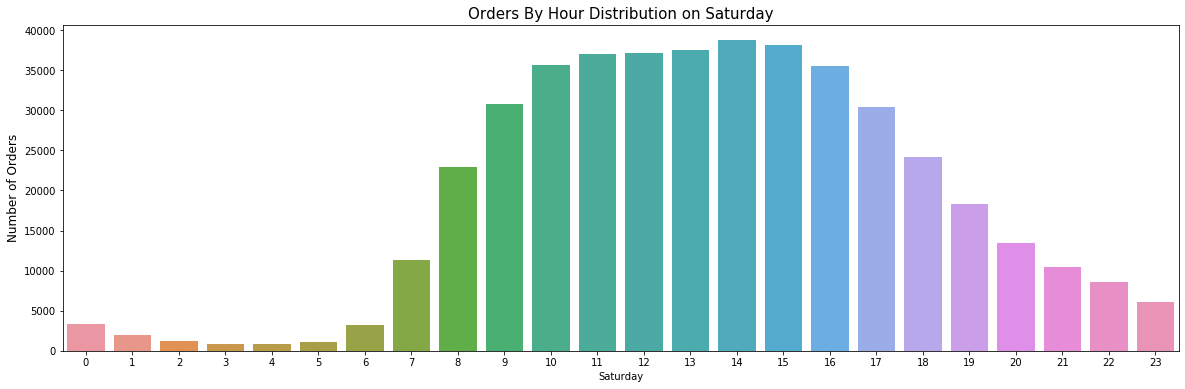

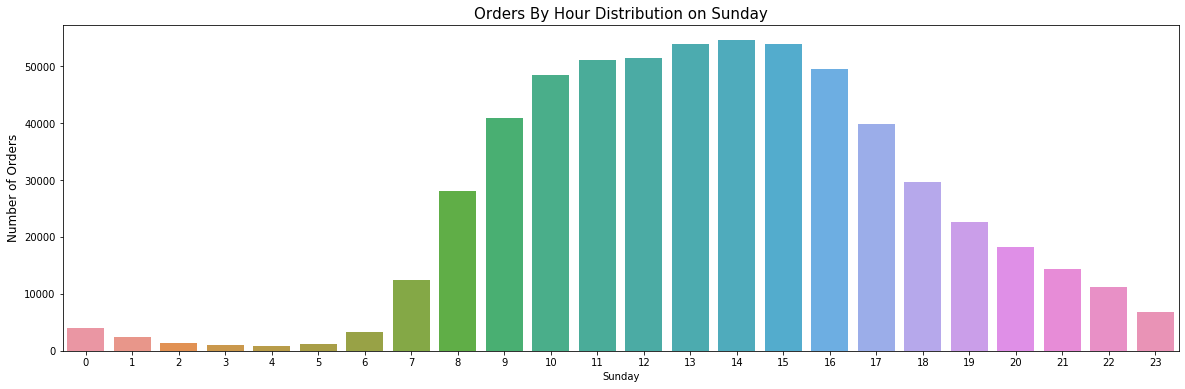

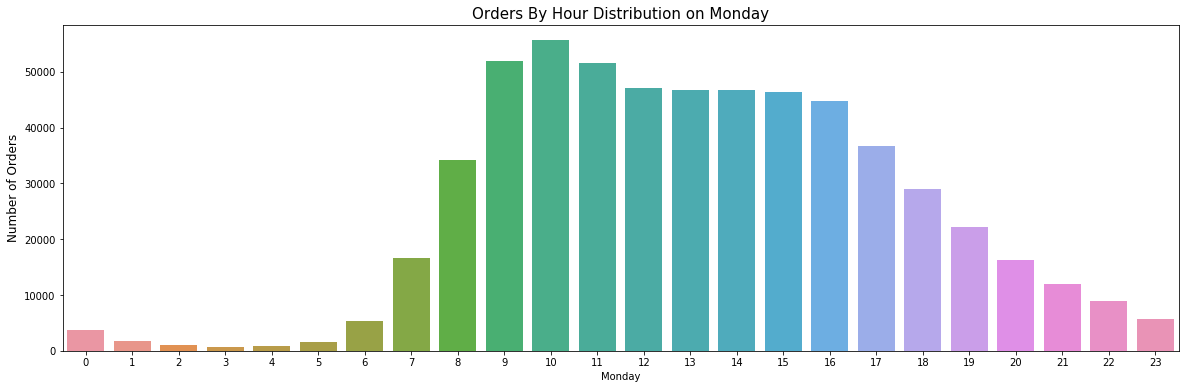

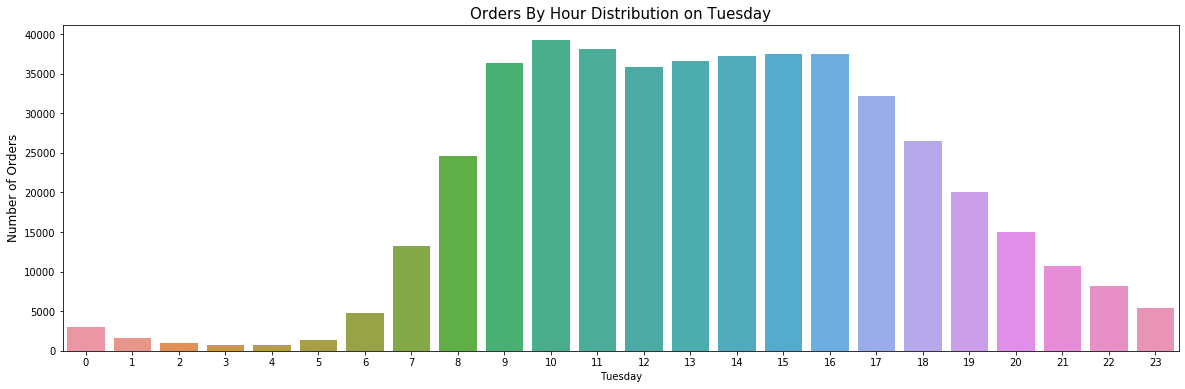

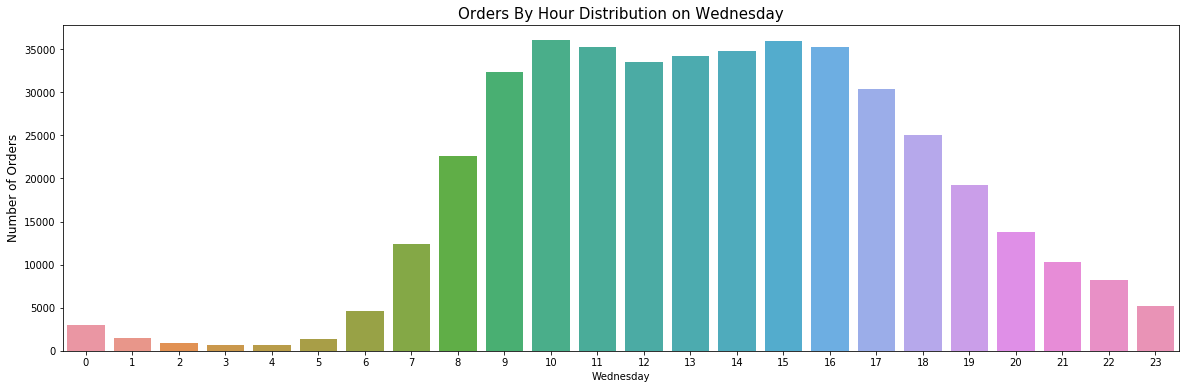

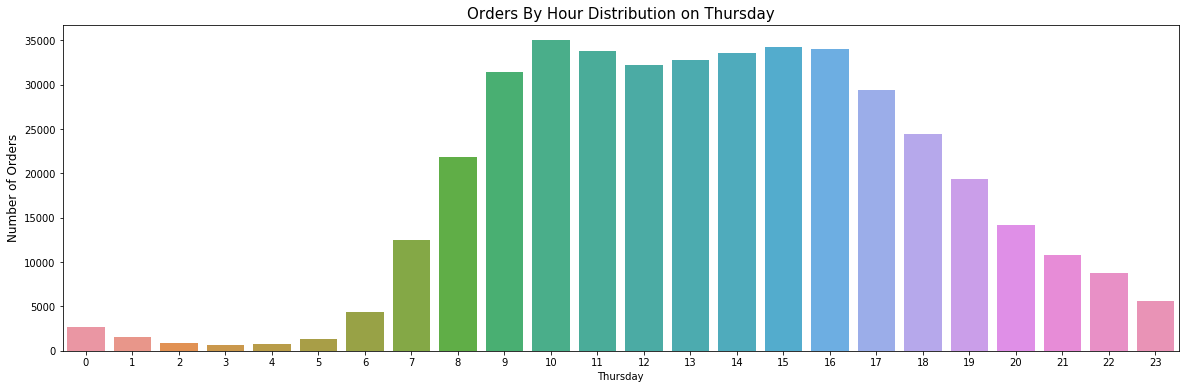

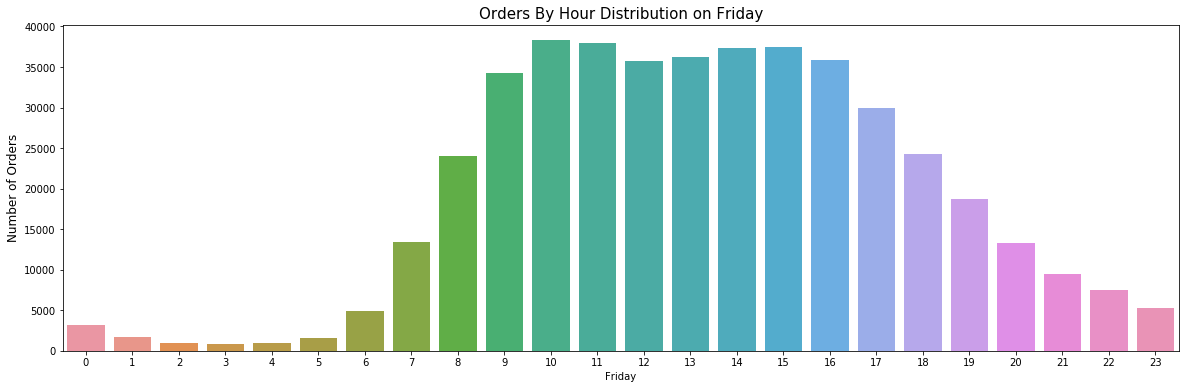

In [21]:
# Orders by hour distribution for the weekend and weekdays patterns
def hourly_distribution_with_days(day):
    plt.figure(figsize=(20,6))
    sns.countplot(x='order_hour_of_day',data=orders_Day[orders_Day['order_d_ow']==day])
    plt.xlabel(day)
    plt.ylabel('Number of Orders', fontsize=12)
    plt.title('Orders By Hour Distribution on ' + day, fontsize=15)
    plt.show()
    
orders_Day = orders.copy()
orders_Day['order_d_ow'] = orders[['order_dow']].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
days = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
for d in days:
    hourly_distribution_with_days(d)

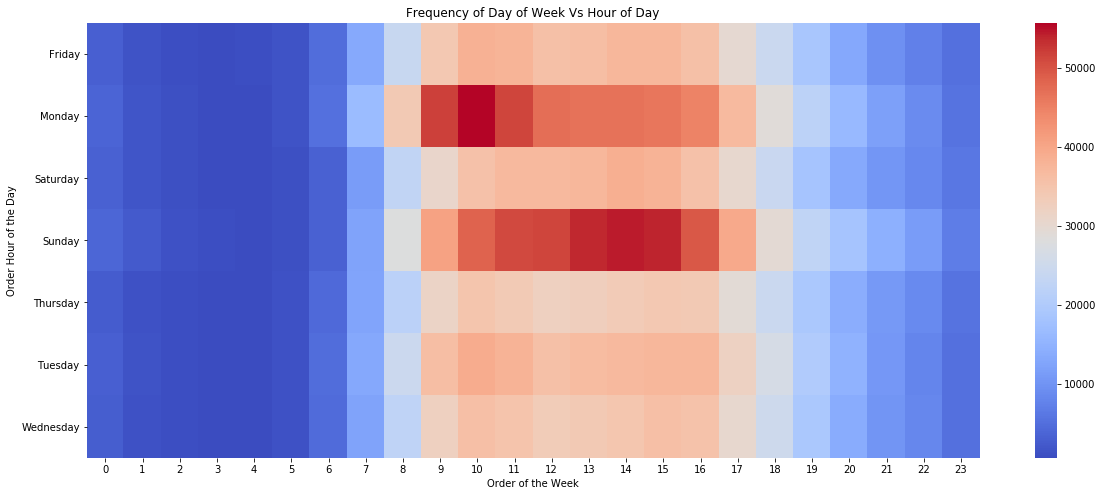

In [22]:
# Combined day of week and hour of day distribution
grouped_dow_hr = orders_Day.groupby(["order_d_ow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_dow_hr = grouped_dow_hr.pivot('order_d_ow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(20,8))
ax = sns.heatmap(grouped_dow_hr, cmap = "coolwarm") 
ax.set(title="Frequency of Day of Week Vs Hour of Day",
      xlabel="Order of the Week",
      ylabel="Order Hour of the Day")
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
plt.show()

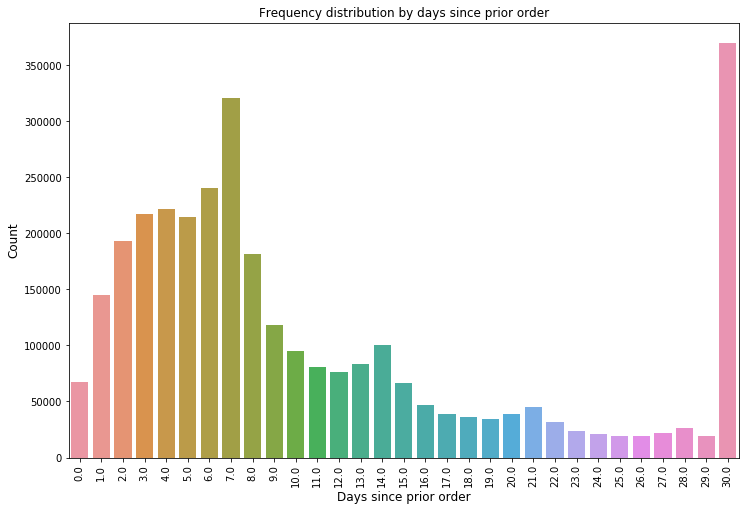

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order")
plt.show()

In [24]:
merged_df = pd.merge(order_products_prior,products, on='product_id', how='left')
merged_df = pd.merge(merged_df,departments, on="department_id", how="left")
merged_df = pd.merge(merged_df, aisles, on='aisle_id', how='left')

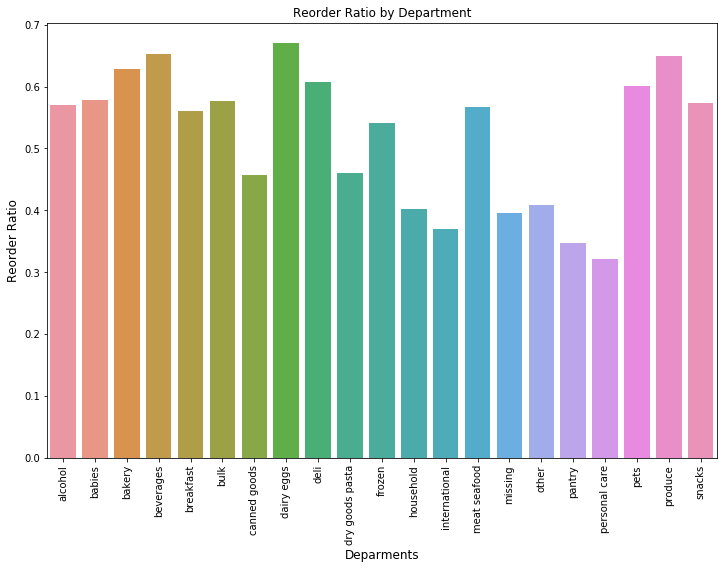

In [25]:
# Get the reorder ratio by department
count_mean = merged_df.groupby("department")["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(count_mean["department"].values, count_mean["reordered"].values)
plt.xticks(rotation = "vertical")
plt.xlabel("Deparments", fontsize=12)
plt.ylabel("Reorder Ratio", fontsize=12)
plt.title("Reorder Ratio by Department")
plt.show()

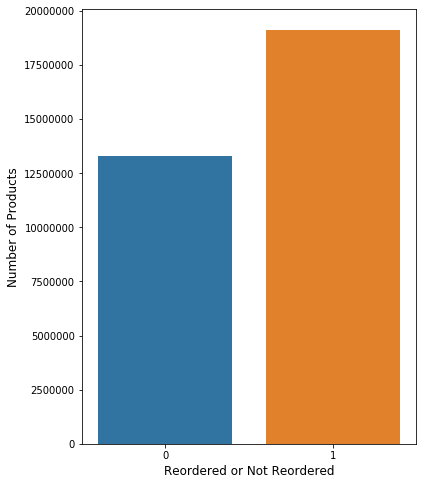

In [26]:
reordered_count = merged_df['reordered'].value_counts()

plt.figure(figsize=(6,8))
sns.barplot(reordered_count.index, reordered_count.values)
plt.ylabel('Number of Products', fontsize=12)
plt.xlabel('Reordered or Not Reordered', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

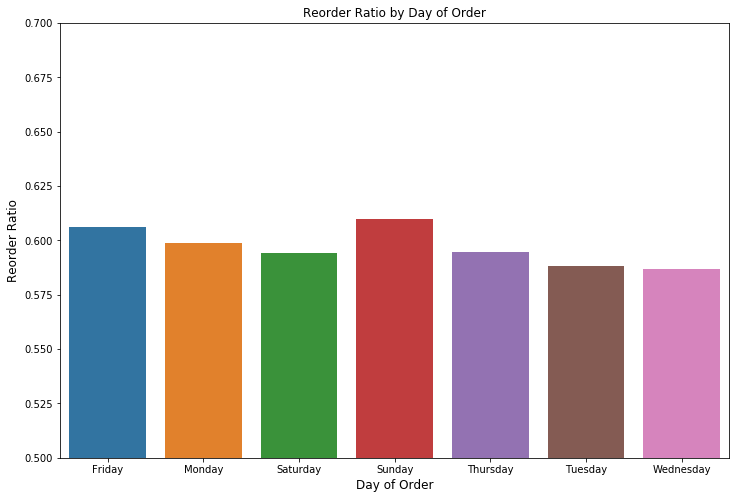

In [27]:
# Get the reorder ratio by days of week
merged_order_products_train = pd.merge(order_products_train, orders_Day, on = 'order_id', how= 'left')
count_reordered_mean = merged_order_products_train.groupby("order_d_ow")["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(count_reordered_mean["order_d_ow"].values, count_reordered_mean["reordered"].values)
plt.xlabel("Day of Order", fontsize=12)
plt.ylabel("Reorder Ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.title("Reorder Ratio by Day of Order")
plt.show()

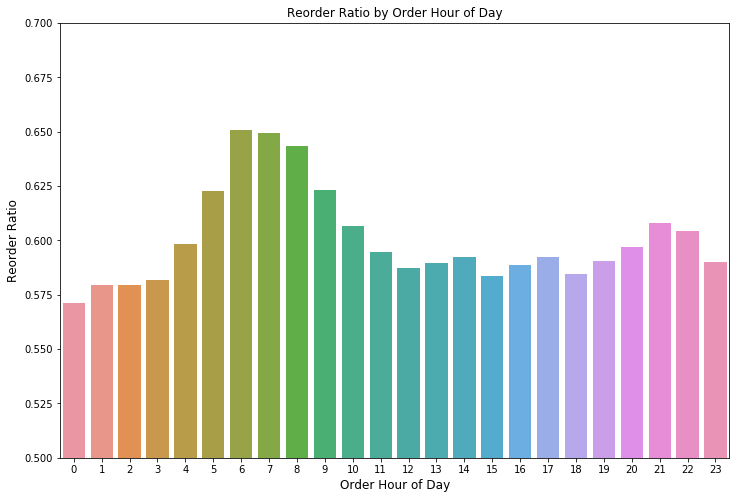

In [28]:
# Orders made in the mornings are most likely to get reordered!
count_order_hr_mean = merged_order_products_train.groupby("order_hour_of_day")["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(count_order_hr_mean["order_hour_of_day"].values, count_order_hr_mean["reordered"].values)
plt.xlabel("Order Hour of Day", fontsize=12)
plt.ylabel("Reorder Ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.title("Reorder Ratio by Order Hour of Day")
plt.show()

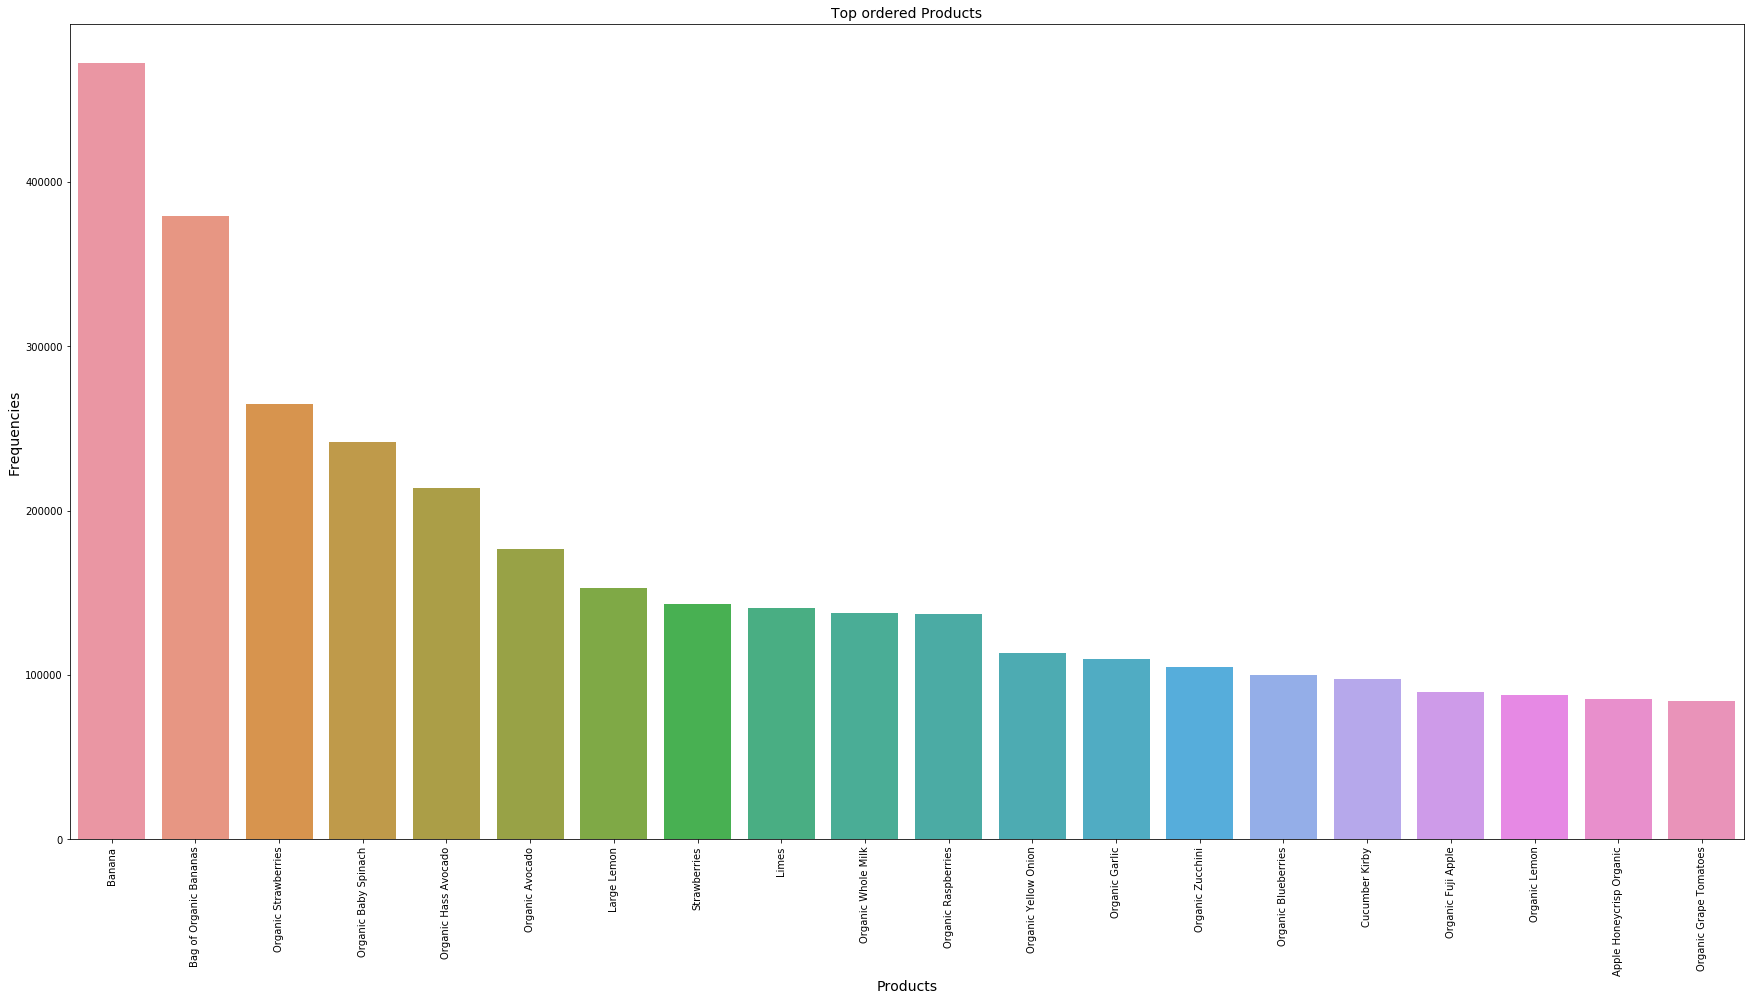

In [29]:
products_count = merged_df['product_name'].value_counts().reset_index().head(20)
products_count.columns = ['product_name','frequency']

# Get the most ordered products
plt.figure(figsize=(30,15))
sns.barplot(products_count.product_name, products_count.frequency)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Products', fontsize=14)
plt.xticks(rotation=90)
plt.title("Top ordered Products", fontsize=14)
plt.show()

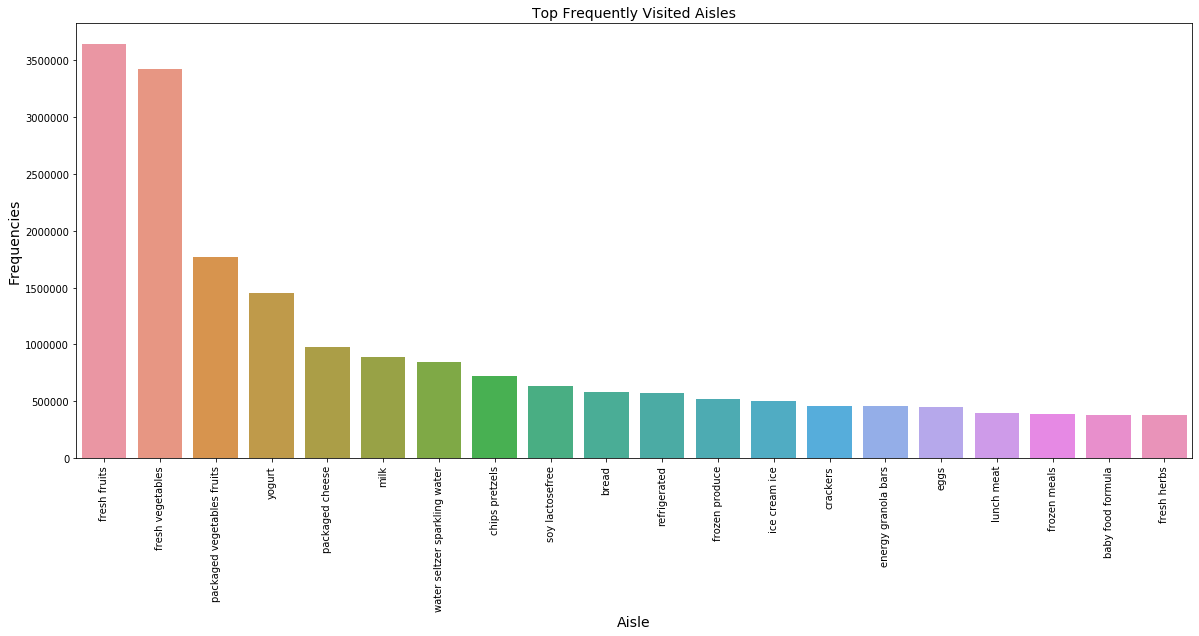

In [30]:
# Get the most frequently visited aisles
aisles_count = merged_df['aisle'].value_counts().head(20)
plt.figure(figsize=(20,8))
sns.barplot(aisles_count.index, aisles_count.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Aisle', fontsize=14)
plt.xticks(rotation=90)
plt.title("Top Frequently Visited Aisles", fontsize=14)
plt.show()

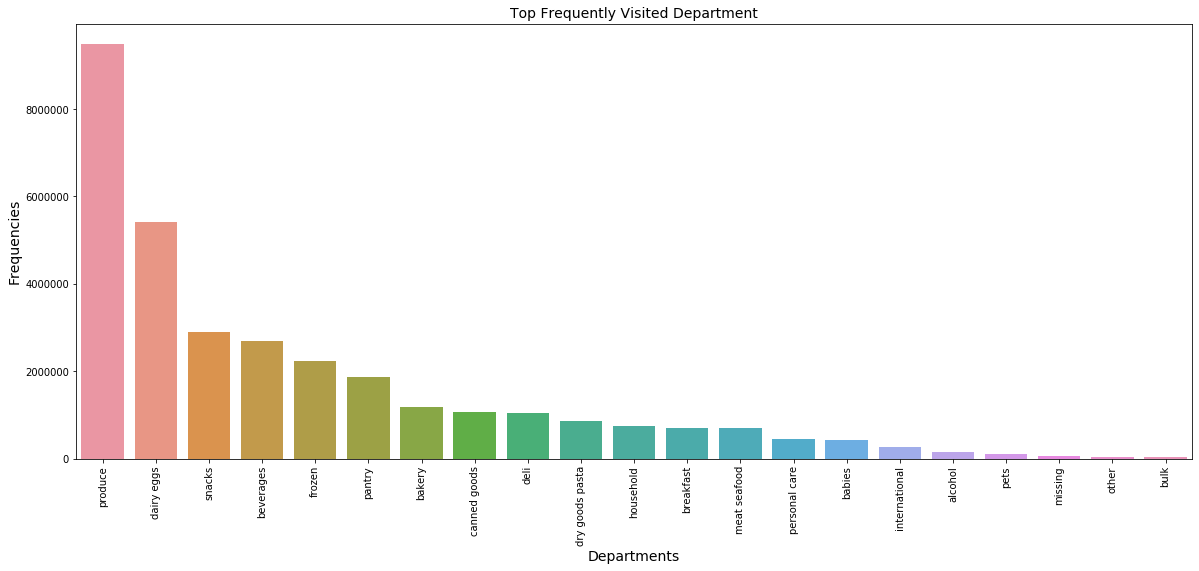

In [31]:
# Get the department wise frequency
dept_count = merged_df['department'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(dept_count.index, dept_count.values)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Departments', fontsize=14)
plt.xticks(rotation=90)
plt.title("Top Frequently Visited Department", fontsize=14)
plt.show()

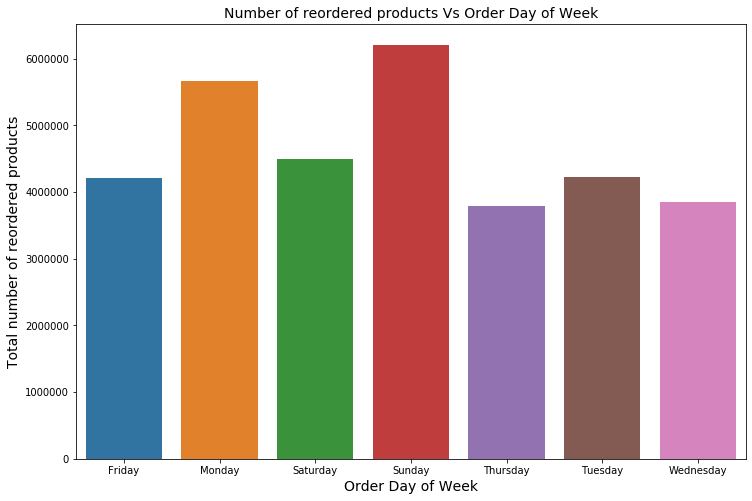

In [32]:
# Get the number of reordered products by days of the week
merged_products_prior_reorders = pd.merge(order_products_prior, orders_Day, on='order_id', how='left')
guouped_products_prior_reorders_dow = merged_products_prior_reorders.groupby(["order_d_ow"])["reordered"].aggregate("count").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(guouped_products_prior_reorders_dow["order_d_ow"].values, guouped_products_prior_reorders_dow["reordered"].values)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('Order Day of Week', fontsize=14)
plt.title("Number of reordered products Vs Order Day of Week", fontsize=14)
plt.show()

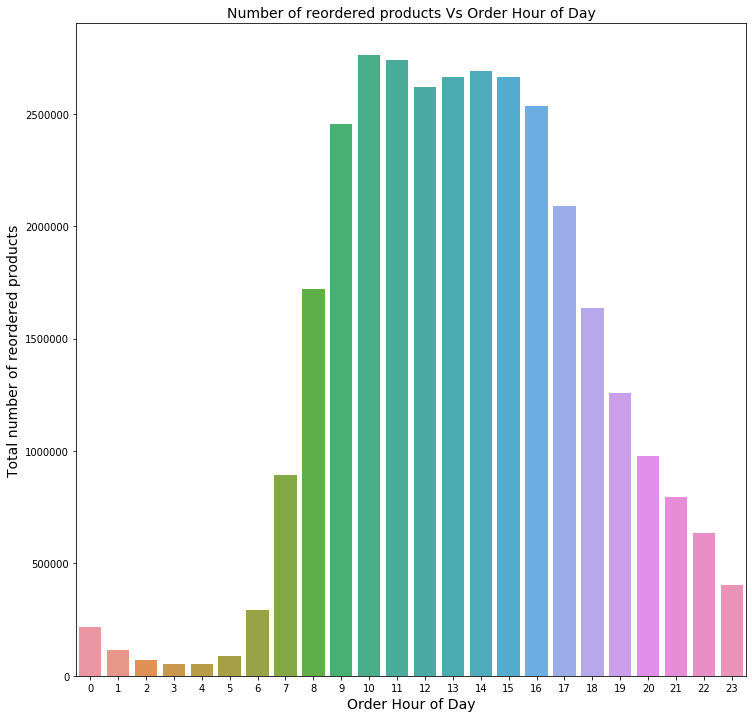

In [33]:
# Finding reorders against hour of the day
grouped_reorders = merged_products_prior_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders.order_hour_of_day, grouped_reorders.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('Order Hour of Day', fontsize=14)
plt.title("Number of reordered products Vs Order Hour of Day", fontsize=14)
plt.show()

**Get correlations**

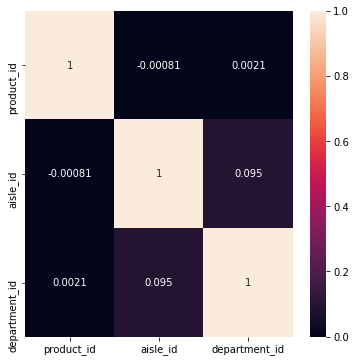

In [34]:
plt.figure(figsize=(6,6))
corr_products = products.corr()
sns.heatmap(corr_products, 
            xticklabels=corr_products.columns.values,
            yticklabels=corr_products.columns.values,annot=True)
plt.show()

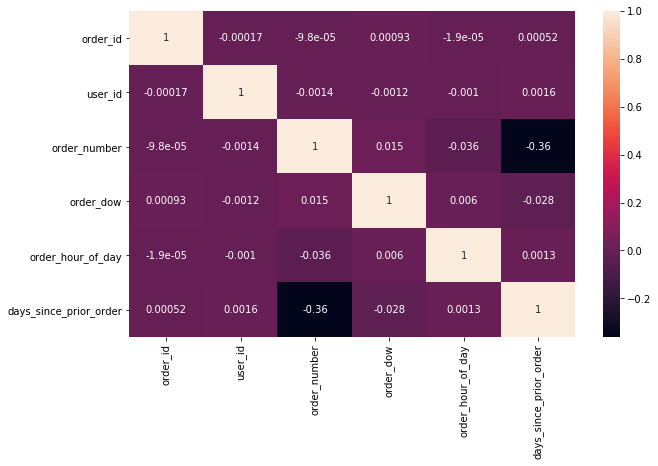

In [35]:
plt.figure(figsize=(10,6))
corr_orders = orders.corr()
sns.heatmap(corr_orders, 
            xticklabels=corr_orders.columns.values,
            yticklabels=corr_orders.columns.values,annot=True)
plt.show()

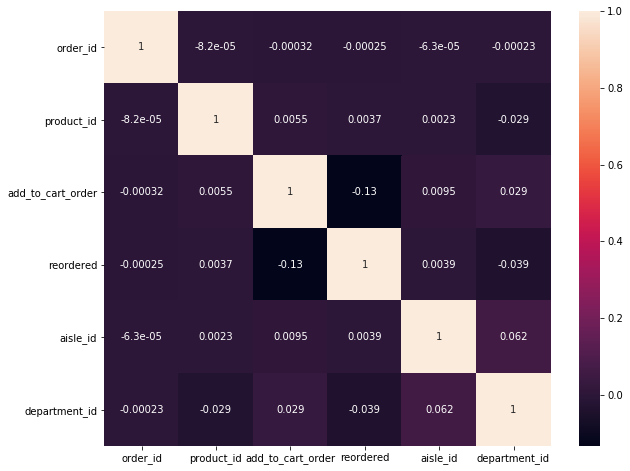

In [36]:
plt.figure(figsize=(10,8))
corr_merged = merged_df.corr()
sns.heatmap(corr_merged, 
            xticklabels=corr_merged.columns.values,
            yticklabels=corr_merged.columns.values, annot=True)
plt.show()

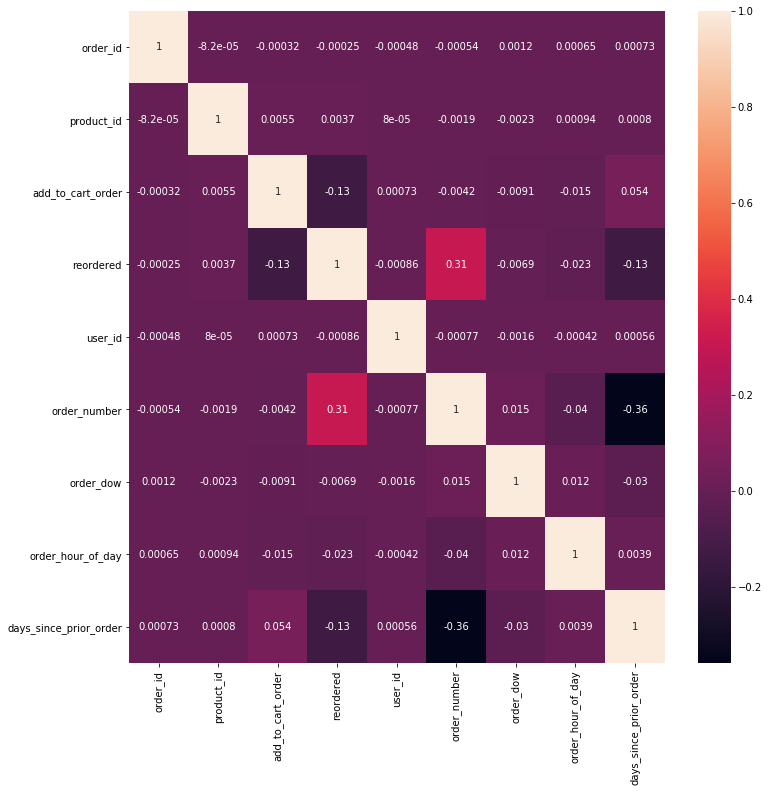

In [37]:
plt.figure(figsize=(12,12))
corr_reorders = merged_products_prior_reorders.corr()
sns.heatmap(corr_reorders, 
            xticklabels=corr_reorders.columns.values,
            yticklabels=corr_reorders.columns.values, annot=True)
plt.show()

### Feature Engineering

In [38]:
combined_df = pd.merge(order_products_train, orders, on='order_id', how='left')
combined_df = pd.merge(combined_df, products, on='product_id', how='left')
combined_df = pd.merge(combined_df, departments, on='department_id', how='left')

In [39]:
combined_df.drop(['eval_set', 'add_to_cart_order'], axis=1, inplace=True)
combined_df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [40]:
df = combined_df.copy()

In [41]:
# Get the average days between orders
df['reorder_interval'] = new_orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float64)
df['reorder_interval'] = df['reorder_interval'].fillna(0)
df['reorder_interval'] = df['reorder_interval'].replace(0, 1)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000


In [42]:
# Get the number of orders
df['n_orders'] = new_orders.groupby('user_id').size().astype(np.int16)
df['n_orders'] = df['n_orders'].replace(np.nan, 0)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval,n_orders
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714,14.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0


In [43]:
# Get the total items
df['total_items'] = df.groupby('user_id').size().astype(np.int16)
df['total_items'] = df['total_items'].replace(np.nan, 0)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval,n_orders,total_items
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714,14.0,31.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0


In [44]:
# Get the average basket 
df['average_basket'] = (df.total_items/df.n_orders).astype(np.float64)
df['average_basket'] = df['average_basket'].replace(np.nan, 0)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval,n_orders,total_items,average_basket
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714,14.0,31.0,2.214286
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000


In [45]:
# Get the ratio between days_since_prior_order and reorder_interval
df['days_reorder_ratio'] = (df.days_since_prior_order/df.reorder_interval).astype(np.float64)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714,14.0,31.0,2.214286,0.552632
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412


In [46]:
# Creating new features orders,reorders and reorder_rate
df['orders'] = df.groupby(df.product_id).size().astype(np.int64) 
df['orders'] = df['orders'].replace(np.nan,0)
df['reorders'] = df['reordered'].groupby(df.product_id).sum().astype(np.float64)
df['reorders'] = df['reorders'].replace(np.nan,0)
df['reorder_rate'] = (df.reorders / df.orders).astype(np.float64)
df['reorder_rate'] = df['reorder_rate'].replace(np.nan,0)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio,orders,reorders,reorder_rate
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684,76.0,49.0,0.644737
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285714,14.0,31.0,2.214286,0.552632,4.0,1.0,0.250000
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000,6.0,6.0,1.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412,22.0,14.0,0.636364


In [47]:
df.drop(['product_name', 'department'], axis=1, inplace=True)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio,orders,reorders,reorder_rate
0,1,49302,1,112108,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.000000
1,1,11109,1,112108,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684,76.0,49.0,0.644737
2,1,10246,0,112108,4,4,10,9.0,83,4,16.285714,14.0,31.0,2.214286,0.552632,4.0,1.0,0.250000
3,1,49683,0,112108,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000,6.0,6.0,1.000000
4,1,43633,1,112108,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412,22.0,14.0,0.636364


**Transforming hour, aisle, department, product, days_since_prior_order, day of week into categories**

In [48]:
hrs = {j:i for i,j in enumerate(df['order_hour_of_day'].unique())}
als = {j:i for i,j in enumerate(df['aisle_id'].unique())}
depts = {j:i for i,j in enumerate(df['department_id'].unique())}
prods = {j:i for i,j in enumerate(df['product_id'].unique())}
dow = {j:i for i,j in enumerate(df['order_dow'].unique())}
dspo = {j:i for i,j in enumerate(df['days_since_prior_order'].unique())}
users = {j:i for i,j in enumerate(df['user_id'].unique())}

In [49]:
df['aisle_id'] = df['aisle_id'].map(als).astype(np.float64)
df['department_id'] = df['department_id'].map(depts).astype(np.float64)
df['product_id'] = df['product_id'].map(prods).astype(np.float64)
df['order_hour_of_day'] = df['order_hour_of_day'].map(hrs).astype(np.float64)
df['order_dow'] = df['order_dow'].map(dow).astype(np.float64)
df['days_since_prior_order'] = df['days_since_prior_order'].map(dspo).astype(np.float64)
df['user_id'] = df['user_id'].map(users).astype(np.float64)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio,orders,reorders,reorder_rate
0,1,0.0,1,0.0,4,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.000000
1,1,1.0,1,0.0,4,0.0,0.0,0.0,1.0,0.0,19.000000,10.0,11.0,1.100000,0.473684,76.0,49.0,0.644737
2,1,2.0,0,0.0,4,0.0,0.0,0.0,2.0,1.0,16.285714,14.0,31.0,2.214286,0.552632,4.0,1.0,0.250000
3,1,3.0,0,0.0,4,0.0,0.0,0.0,2.0,1.0,12.000000,12.0,0.0,0.000000,0.750000,6.0,6.0,1.000000
4,1,4.0,1,0.0,4,0.0,0.0,0.0,3.0,2.0,17.000000,5.0,0.0,0.000000,0.529412,22.0,14.0,0.636364


In [50]:
df['reordered'] = df['reordered'].astype(np.float64)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,reorder_interval,n_orders,total_items,average_basket,days_reorder_ratio,orders,reorders,reorder_rate
0,1,0.0,1.0,0.0,4,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.000000
1,1,1.0,1.0,0.0,4,0.0,0.0,0.0,1.0,0.0,19.000000,10.0,11.0,1.100000,0.473684,76.0,49.0,0.644737
2,1,2.0,0.0,0.0,4,0.0,0.0,0.0,2.0,1.0,16.285714,14.0,31.0,2.214286,0.552632,4.0,1.0,0.250000
3,1,3.0,0.0,0.0,4,0.0,0.0,0.0,2.0,1.0,12.000000,12.0,0.0,0.000000,0.750000,6.0,6.0,1.000000
4,1,4.0,1.0,0.0,4,0.0,0.0,0.0,3.0,2.0,17.000000,5.0,0.0,0.000000,0.529412,22.0,14.0,0.636364


In [51]:
df.to_csv(r'instacart.csv', index=False)